# Описание

В данном ноутбуке представлен описательный анализ данных об участниках исследования из города Фреймингем, посвященному изучению сердечно-сосудистых заболеваний. Также построена модель машинного обучения, решающая задачу классификации пациентов (есть ли риск развития ССЗ).

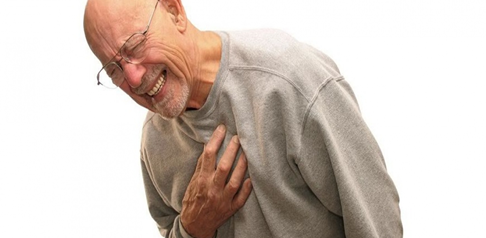
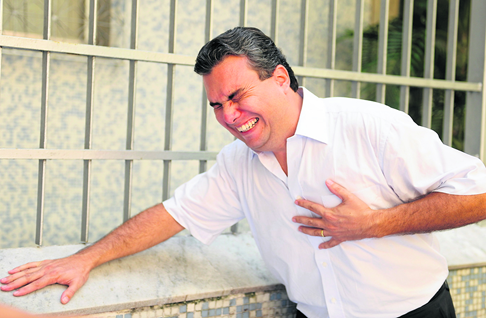
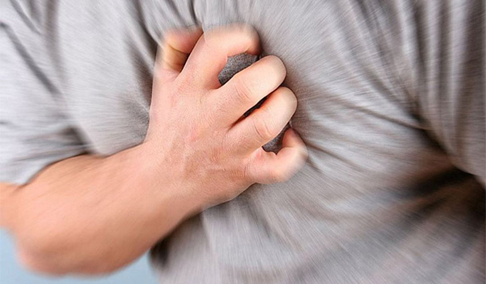

# Импорт библиотек и просмотр данных

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["figure.autolayout"] = True
import warnings
warnings.filterwarnings("ignore")

In [199]:
np.set_printoptions(linewidth=100)
pd.set_option('display.max_columns', None)

In [200]:
df = pd.read_csv(r'C:\Users\Максим\Desktop\Аналитика данных\Datasets\framingham.csv')

**Признаки**

**Демографические** <br>
• Sex: пол - мужчина или женщина <br>
• Age: возраст <br>
**Поведенческие** <br>
• Current Smoker: курит ли человек <br>
• Cigs Per Day: среднее количество выкуренных сигарет в день <br>
**Медицинские (история)** <br>
• BP Meds: проходил ли пациент лечение болезней, связанных с кровяным давлением <br>
• Prevalent Stroke: был ли ранее инсульт <br>
• Prevalent Hyp: была ли ранее гипертония <br>
• Diabetes: был ли ранее диабет <br>
**Медицинские (на данный момент)** <br>
• Tot Chol: уровень холестерина <br>
• Sys BP: систолическое давление <br>
• Dia BP: диастолическое давление <br>
• BMI: индекс массы тела <br>
• Heart Rate: частота сердечных сокращений <br>
• Glucose: уровень глюкозы <br>
**Целевая переменная** <br>
• Риск развития ишемической болезни сердца в течение ближайших 10 лет (0 - нет риска, 1 - есть риск) <br>

In [201]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [203]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [204]:
#Необходимо заполнить пропущенные значения

In [205]:
df.fillna(df.median(), inplace=True)

In [206]:
df.isnull().sum().sum()

0

In [207]:
# Создадим датафрейм с исходными признаками для сравнения

df_0 = df.copy() 

In [208]:
#Соотношение между верхним и нижним давлением

df['bp_ratio'] = df.sysBP/df.diaBP 

In [209]:
def bmi_category_func(x):
    if x<18:
        return 1 #Ниже нормы
    elif 18<x<26:
        return 2 #Норма
    elif 26<x<30:
        return 3 #Выше нормы
    else:
        return 4 #Ожирение

df['BMI_category'] = df['BMI'].apply(bmi_category_func)

In [210]:
def bp_category_func(x):
    if x<90:
        return 1 #Гипотония
    elif 90<x<140:
        return 2 #Норма
    elif 140<x<160:
        return 3 #Гипертония 1 степени (легкая)
    elif 160<x<180:
        return 4 #Гипертония 2 степени (средняя)
    else:
        return 5 #Гипертония 3 степени (тяжелая)

df['BP_category'] = df['sysBP'].apply(bp_category_func)

In [211]:
disease_cols = ['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
df['diseases_before'] = df[disease_cols].sum(axis=1).apply(lambda x: 1 if x>0 else x)

In [212]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,bp_ratio,BMI_category,BP_category,diseases_before
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1.514286,3,2,0.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1.493827,3,2,0.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1.593750,2,2,0.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1.578947,3,3,1.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1.547619,2,2,0.0


In [213]:
df['education'] = df['education'].astype('int')
df['cigsPerDay'] = df['cigsPerDay'].astype('int')
df['BPMeds'] = df['BPMeds'].astype('int')

In [214]:
# Признаки формата float

float_feat = df.dtypes[df.dtypes=='float64'].index

In [215]:
# Удаление выбросов

for f in float_feat:
    upper_lim = df[f].mean() + 3*df[f].std()
    lower_lim = df[f].mean() - 3*df[f].std() 
    df = df[(df[f] < upper_lim) & (df[f] > lower_lim)]

# Описательный анализ

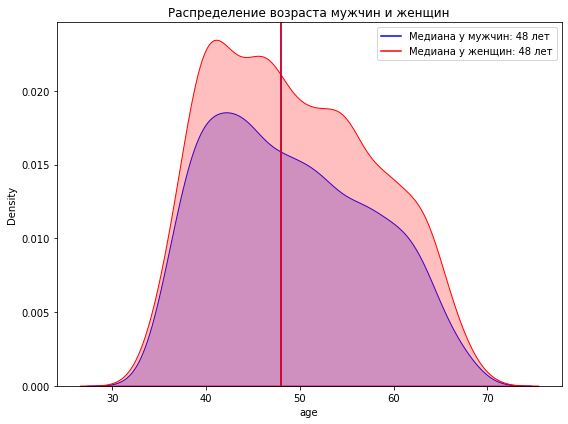

In [216]:
male = df[df['male']==1]['age']
female = df[df['male']==0]['age']

plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='age', hue='male', palette=['r','b'], fill=True)
plt.title('Распределение возраста мужчин и женщин')
plt.axvline(male.median(), color='b', label=f'Медиана у мужчин: {male.median().astype(int)} лет')
plt.axvline(female.median(), color='r', label=f'Медиана у женщин: {female.median().astype(int)} лет')
plt.legend()
plt.show()

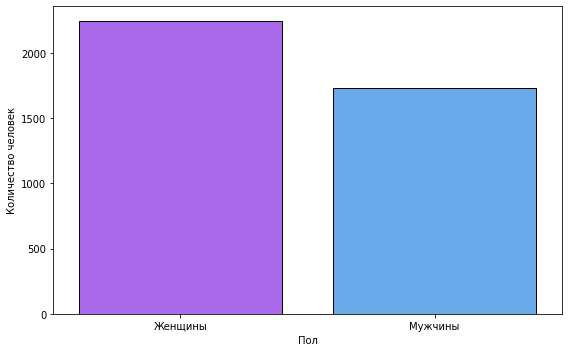

In [217]:
plt.figure(figsize=(8,5))
ax = sns.countplot(df['male'], palette='cool_r', ec='k')
ax.set_xticklabels(['Женщины', 'Мужчины'])
plt.xlabel('Пол')
plt.ylabel('Количество человек')
plt.show()

Медианный возраст в мужской и женской группе составляет 48 лет. Женщин, очевидно, больше, чем мужчин.

In [218]:
df_melt = pd.melt(df, value_vars=['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD'])
df_melt = pd.DataFrame(df_melt.groupby(['variable', 'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

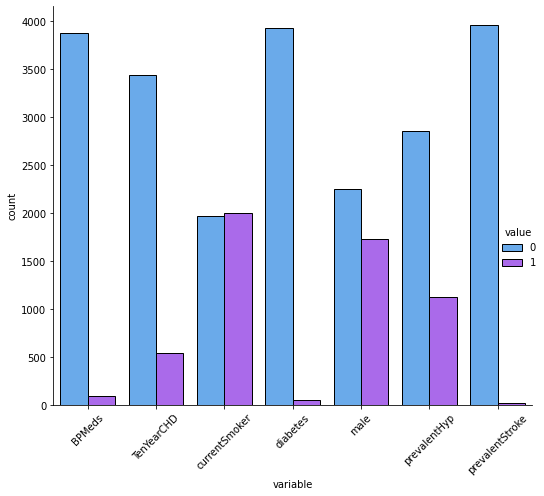

In [219]:
sns.factorplot(data=df_melt, x='variable', y='count', hue='value', kind='bar', size=7, ec='k', palette='cool')
plt.xticks(rotation=45);

Синие столбцы - люди, относящиеся к здоровой группе, фиолетовые - к группе риска

In [220]:
smokers = df.groupby(['male', 'currentSmoker'], as_index=False).size()
smokers

,male,currentSmoker,size
0,0,0,1302
1,0,1,942
2,1,0,670
3,1,1,1059


In [221]:
male_smokers = smokers[(smokers['currentSmoker']==1)&(smokers['male']==1)]['size'].sum()
female_smokers = smokers[(smokers['currentSmoker']==1)&(smokers['male']==0)]['size'].sum()
male_non_smokers = smokers[(smokers['currentSmoker']==0)&(smokers['male']==1)]['size'].sum()
female_non_smokers = smokers[(smokers['currentSmoker']==0)&(smokers['male']==0)]['size'].sum()
smokers_count = smokers[smokers['currentSmoker']==1]['size'].sum()
non_smokers_count = smokers[smokers['currentSmoker']==0]['size'].sum()

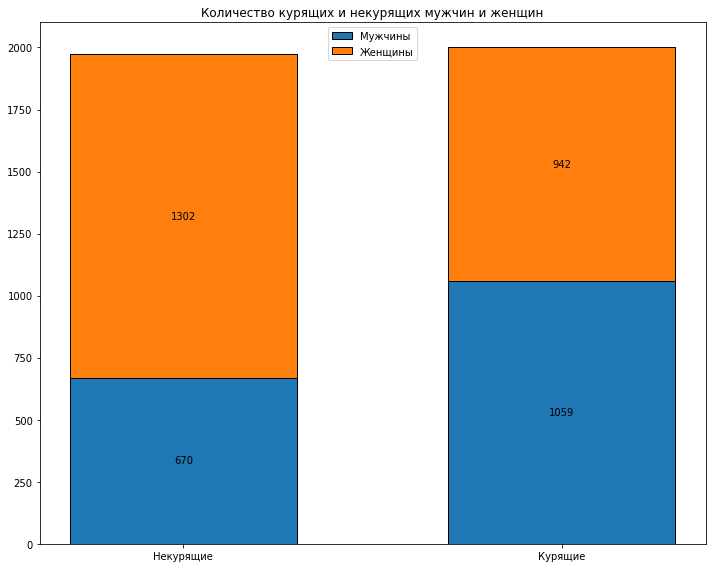

In [222]:
fig, ax = plt.subplots(figsize=(10,8))
width = 0.6
labels = ['Некурящие', 'Курящие']

x = smokers[smokers['male']==1]['size']
y = smokers[smokers['male']==0]['size']
ax1 = plt.bar(labels, x, width, label='Men', lw=1, ec='k')
ax2 = plt.bar(labels, y, width, bottom=x, label='Women', lw=1, ec='k')

for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
    
plt.legend(loc='upper center', labels=['Мужчины', 'Женщины'])
plt.tight_layout()
plt.title('Количество курящих и некурящих мужчин и женщин')
plt.show()

Большинство мужчин в исследовании курит.

In [223]:
df.corr()['TenYearCHD'].sort_values(ascending=False)[1::]

age                0.208946
sysBP              0.171340
prevalentHyp       0.148439
diseases_before    0.146880
BP_category        0.132578
diaBP              0.126262
male               0.093327
bp_ratio           0.091990
cigsPerDay         0.066572
totChol            0.066401
BPMeds             0.056231
prevalentStroke    0.054812
BMI                0.053533
BMI_category       0.048461
currentSmoker      0.029422
glucose            0.024526
diabetes           0.018865
heartRate          0.015801
education         -0.037572
Name: TenYearCHD, dtype: float64

Наибольшее влияние на вероятность развития ишемической болезни сердца оказывают возраст, систолическое давление, разность давлений, наличие гипертонии, болезней до этого и диастолическое давление.

In [224]:
pie_data = df['TenYearCHD'].value_counts()
pie_data

0    3433
1     540
Name: TenYearCHD, dtype: int64

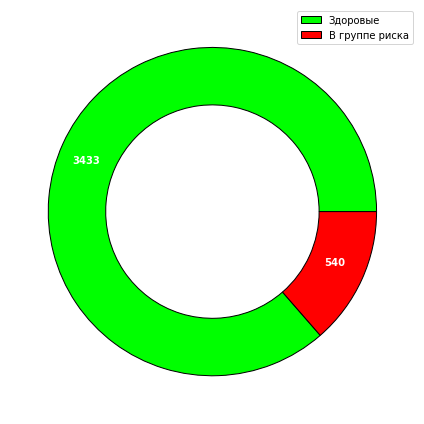

In [225]:
plt.pie(pie_data, wedgeprops = dict(width = 0.35, edgecolor ='k'), labels=pie_data, labeldistance = 0.75, textprops={'color':"w", 'weight':'heavy'}, colors=['lime', 'r'])
plt.legend(['Здоровые', 'В группе риска']);

Большей части пациентов из датасета болезнь сердца не грозит. Очевиден дизбаланс классов.

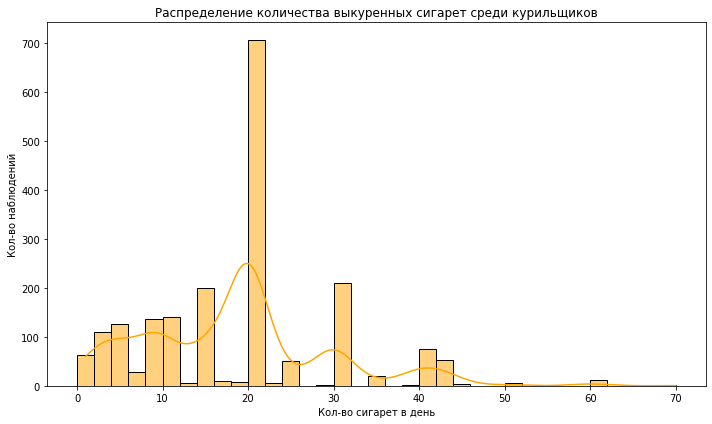

In [226]:
cigs_smoked = df[df['cigsPerDay']!=0]['cigsPerDay']
sns.histplot(cigs_smoked, bins=np.arange(0, cigs_smoked.max()+1, 2), color='orange', kde=True)
plt.title('Распределение количества выкуренных сигарет среди курильщиков')
plt.xlabel('Кол-во сигарет в день')
plt.ylabel('Кол-во наблюдений')
plt.show()

In [227]:
df.groupby(['male','TenYearCHD'], as_index=False)['TenYearCHD'].size()

,male,TenYearCHD,size
0,0,0,2002
1,0,1,242
2,1,0,1431
3,1,1,298


Мужчины подвержены большему риску сердечной болезни, нежели женщины

In [228]:
CHD_age = df[df['TenYearCHD']==1].groupby('age').size()[:-1] #Кол-во пациентов, подверженных риску ИБС и их возраст

CHD_age = CHD_age.values.reshape(-1, 5).sum(1)

no_CHD_age = df[df['TenYearCHD']==0].groupby('age').size()[3:-1]

no_CHD_age = no_CHD_age.values.reshape(-1, 5).sum(1)

In [229]:
CHD_risk_age = CHD_age/(no_CHD_age+CHD_age)

CHD_risk_age 

array([0.04389313, 0.0738975 , 0.11184211, 0.16133942, 0.19366197, 0.23809524, 0.31386861])

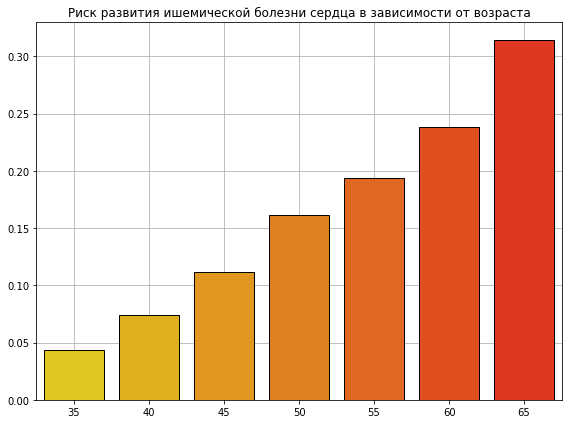

In [230]:
plt.figure(figsize=(8,6))
sns.barplot(x=np.arange(35, 70, 5), y=CHD_risk_age, palette='autumn_r', zorder=2, ec='k')
plt.title('Риск развития ишемической болезни сердца в зависимости от возраста')
plt.grid(True)
plt.show()

Очевидна тенденция повышения риска развития болезни сердца при увеличении возраста человека

## Корреляции

In [231]:
cont_feat = ['age', 'sysBP', 'diaBP', 'bp_ratio', 'cigsPerDay', 'totChol', 'BMI', 'glucose', 'heartRate', 'TenYearCHD']

In [232]:
cont_df = df[cont_feat]

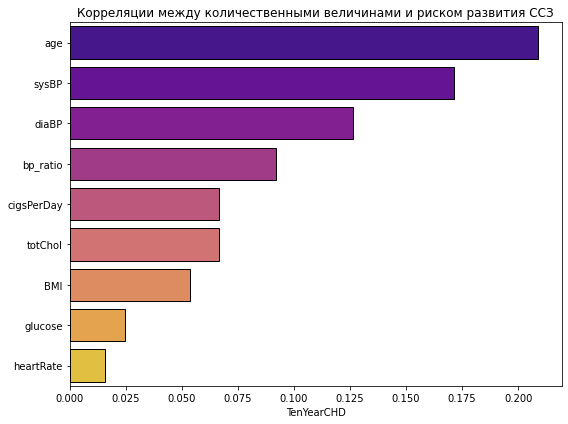

In [233]:
plt.figure(figsize=(8, 6))
cont_corr = cont_df.corr()['TenYearCHD'].sort_values(ascending=False)[1:]
sns.barplot(data=cont_corr.to_frame(), y=cont_corr.index, x=cont_corr, ec='k', palette='plasma')
plt.title('Корреляции между количественными величинами и риском развития ССЗ');

In [234]:
from scipy.stats import pearsonr, spearmanr, pointbiserialr, chi2_contingency

corr_and_p = []
for col in cont_feat:
    r = pointbiserialr(df[col], df['TenYearCHD'])
    corr_and_p.append(r)

In [235]:
# Взаимосвязь категориального и числового признаков¶

cat_num_corr = pd.DataFrame(corr_and_p[:-1], index=cont_feat[:-1]).rename(columns={0:'correlation', 1:'p-value'})
cat_num_corr

,correlation,pvalue
age,0.208946,1.937464e-40
sysBP,0.171340,1.484102e-27
diaBP,0.126262,1.371293e-15
bp_ratio,0.091990,6.291663e-09
cigsPerDay,0.066572,2.674939e-05
totChol,0.066401,2.806228e-05
BMI,0.053533,7.364896e-04
glucose,0.024526,1.221835e-01
heartRate,0.015801,3.193854e-01


In [236]:
top_6_factors = df.corr()['TenYearCHD'].sort_values(ascending=False)[1:7]
top_6_factors

age                0.208946
sysBP              0.171340
prevalentHyp       0.148439
diseases_before    0.146880
BP_category        0.132578
diaBP              0.126262
Name: TenYearCHD, dtype: float64

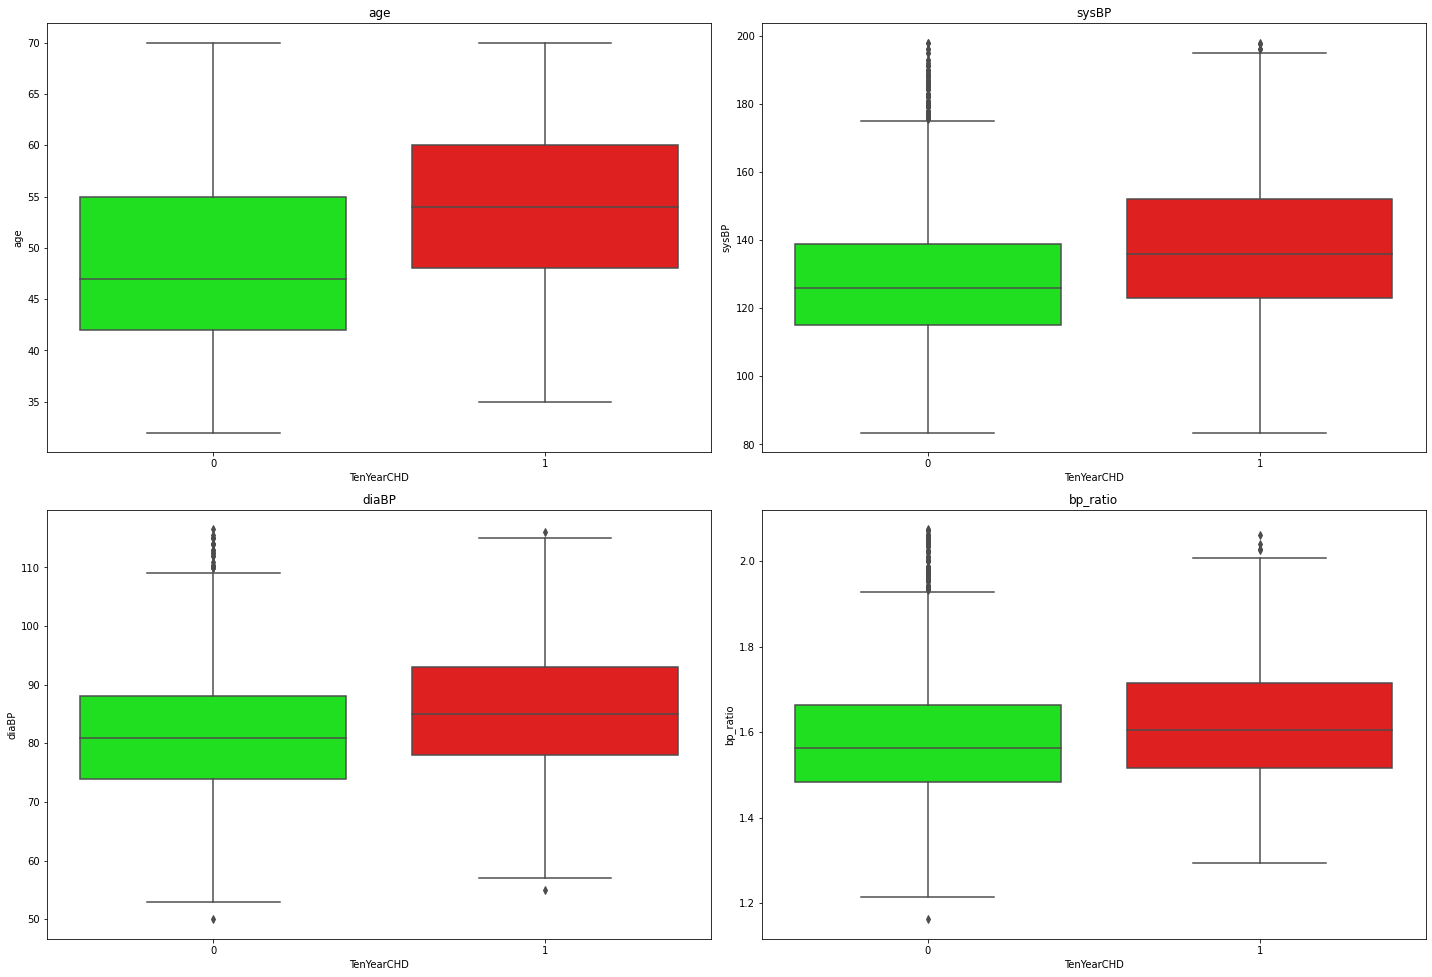

In [237]:
plt.figure(figsize=(20,20))
for n,i in enumerate(['age', 'sysBP', 'diaBP', 'bp_ratio'], start=1):
    plt.subplot(3, 2, n)
    sns.boxplot(data=df, x='TenYearCHD', y=i, palette=['lime', 'red'])
    plt.title(i)
plt.show()

Основной признак, отличающий здоровых людей от людей в группе риска развития ССЗ это давление. У людей из второй группы оно как правило выше. Также играет роль возраст.

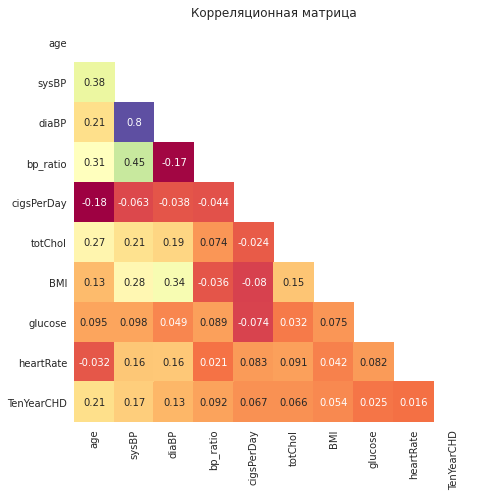

In [238]:
corr = cont_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    ax = sns.heatmap(corr, mask=mask, annot=True, square=True, cmap='Spectral', cbar=False)

plt.title('Корреляционная матрица')
plt.show()

Как правило, люди с высоким давлением имеют гипертонию (это очевидно), с возрастом давление и холестерин повышается, возрастает вероятность гипертонии. Между индексом массы тела и давлением также обнаружена положительная корреляция. Любопытно и то, что с возрастом увеличивается соотношение систолического и диастолического давлений.

In [239]:
pd.concat([df[df['TenYearCHD']==0].median(), df[df['TenYearCHD']==1].median()], axis=1)

,0,1
male,0.000000,1.000000
age,47.000000,54.000000
education,2.000000,2.000000
currentSmoker,0.000000,1.000000
cigsPerDay,0.000000,5.000000
BPMeds,0.000000,0.000000
prevalentStroke,0.000000,0.000000
prevalentHyp,0.000000,0.000000
diabetes,0.000000,0.000000
totChol,232.000000,240.000000


Медианные характеристики людей из обеих групп.

In [240]:
description = df[cont_feat[:-1]].describe().T.drop('count', axis=1)
description

,mean,std,min,25%,50%,75%,max
age,49.229801,8.489600,32.000000,42.0000,48.000000,56.000000,70.000000
sysBP,130.172665,19.220143,83.500000,116.0000,127.500000,141.000000,198.000000
diaBP,82.187390,10.767352,50.000000,74.0000,81.000000,89.000000,116.500000
bp_ratio,1.587113,0.143018,1.162304,1.4875,1.569767,1.670886,2.074627
cigsPerDay,9.132142,11.967790,0.000000,0.0000,0.000000,20.000000,70.000000
totChol,235.267053,41.758253,107.000000,205.0000,234.000000,261.000000,367.000000
BMI,25.526227,3.605422,15.540000,23.0300,25.310000,27.860000,37.480000
glucose,79.429398,12.552623,40.000000,72.0000,78.000000,85.000000,145.000000
heartRate,75.352379,11.422609,44.000000,68.0000,75.000000,82.000000,110.000000


Очевидно, повышенное давление с высокой долей вероятности может вызвать проблемы с сердцем в будущем.

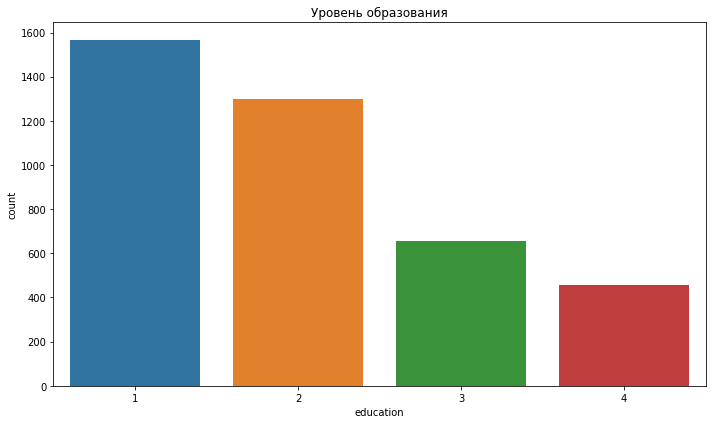

In [241]:
sns.countplot(data=df, x='education')
plt.title('Уровень образования')
plt.show()

Немалая часть людей не имеет высшего образования.

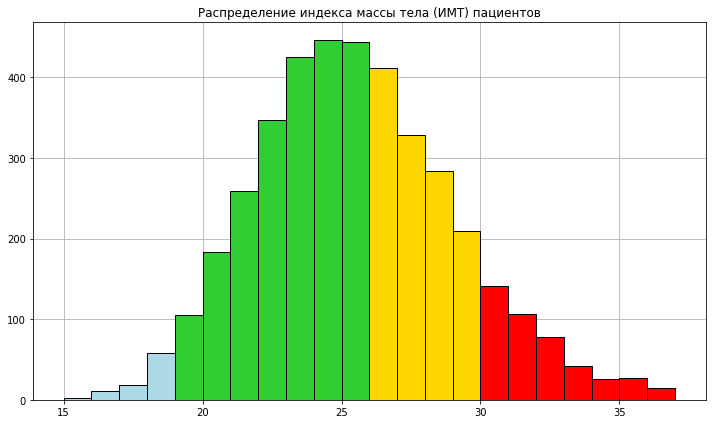

In [242]:
N, bins, patches = plt.hist(data=df, x='BMI', bins=np.arange(int(df['BMI'].min()), int(df['BMI'].max()+1)), ec='k', zorder=2)

for i in range(0, list(bins).index(19)):
    patches[i].set_facecolor('lightblue')
for i in range(list(bins).index(19), list(bins).index(26)):
    patches[i].set_facecolor('limegreen')
for i in range(list(bins).index(26), list(bins).index(30)):
    patches[i].set_facecolor('gold')    
for i in range(list(bins).index(30), list(bins).index(37)):
    patches[i].set_facecolor('r')

plt.title('Распределение индекса массы тела (ИМТ) пациентов')
plt.grid(True)
plt.show()

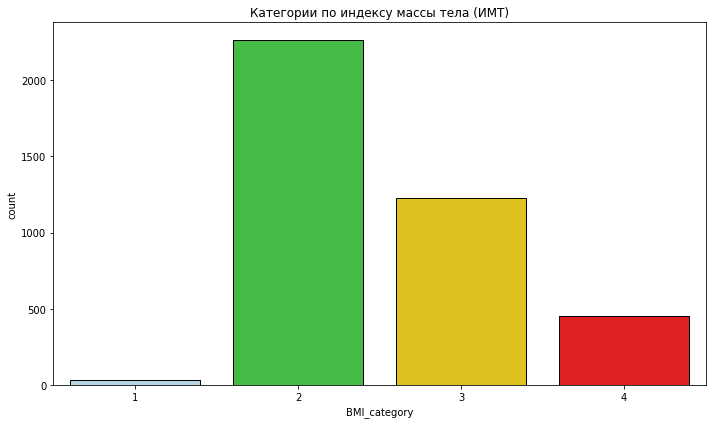

In [243]:
sns.countplot(data=df, x='BMI_category', palette=['lightblue', 'limegreen', 'gold', 'r'], ec='k')
plt.title('Категории по индексу массы тела (ИМТ)')
plt.show()

Большая часть людей имеет нормальный индекс массы тела.

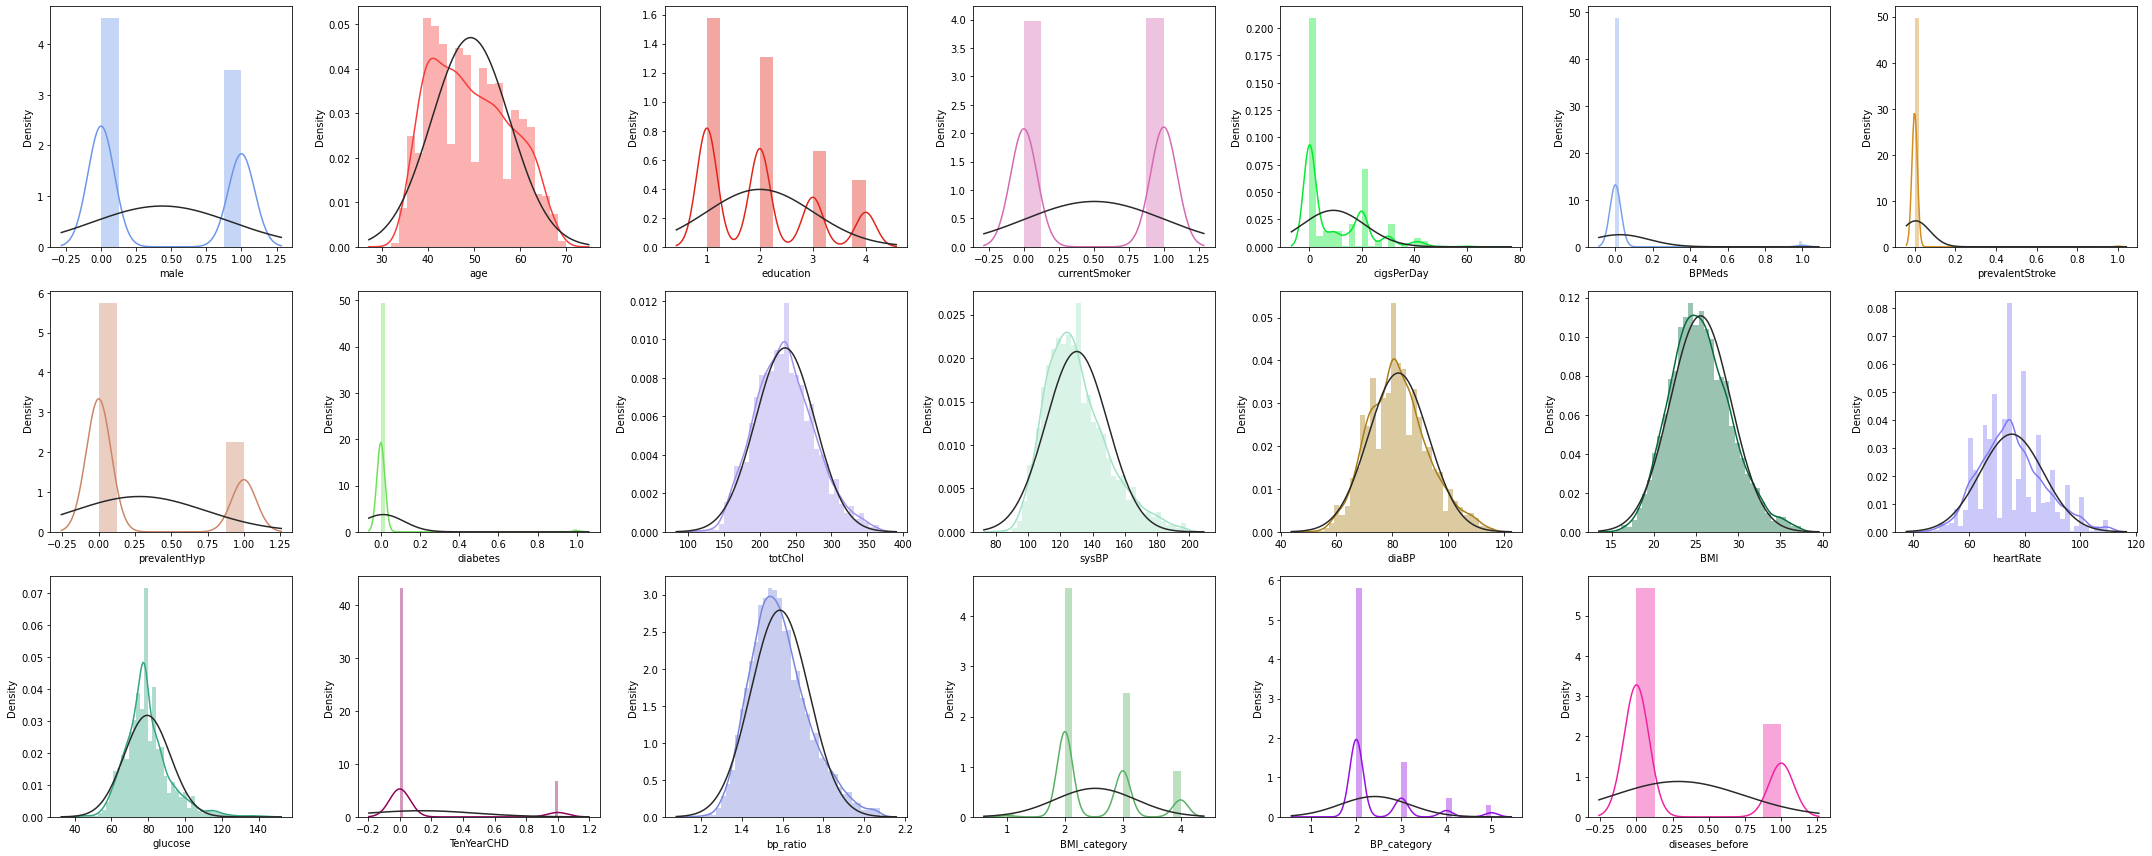

In [244]:
from scipy.stats import norm
plt.figure(figsize=(30, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
for n,i in enumerate(df[df.columns], start=1):
    plt.subplot(3, 7, n)
    sns.distplot(df[i], fit=norm, color=(np.random.rand(), np.random.rand(), np.random.rand()))
# plt.savefig('hs_dist')

Распределение большей части признаков близко к нормальному.

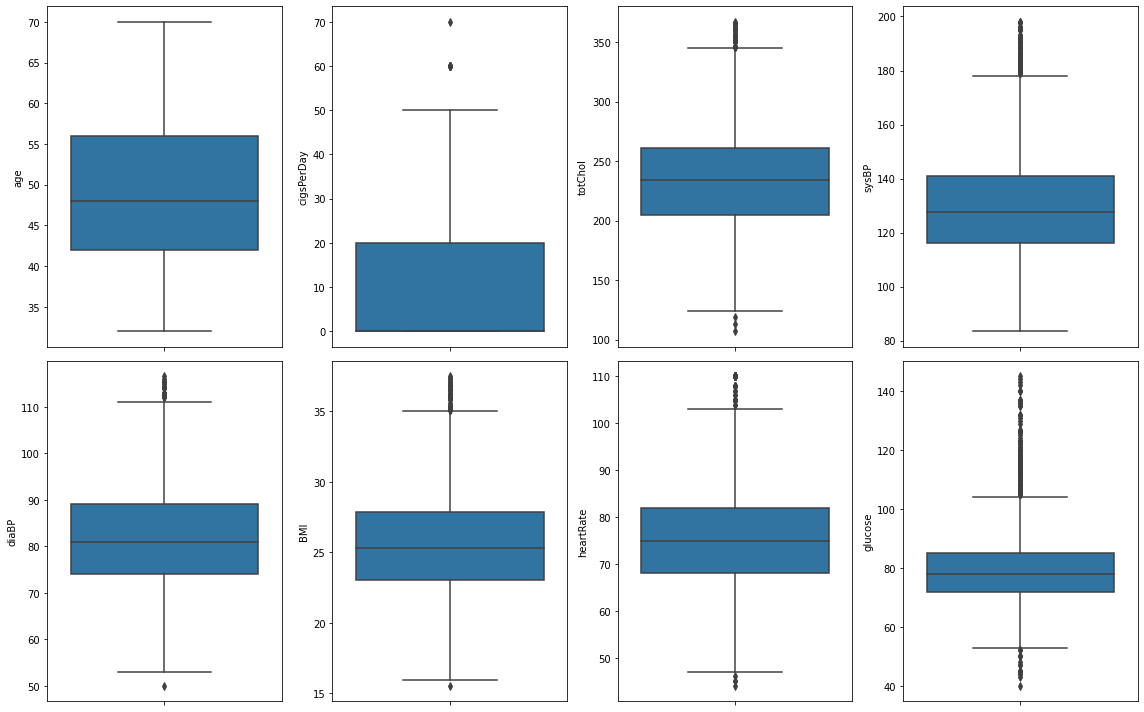

In [245]:
plt.figure(figsize=(16,10))

for i,col in enumerate(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'] ):    
    plt.subplot(2,4,i + 1)
    sns.boxplot(y=col, data=df)

plt.tight_layout()

plt.show()

В имеющихся данных много выбросов, от которых в дальнейшем нужно будет избавиться.

In [246]:
skewness = cont_df.skew().to_frame().rename(columns={0:'skewness'})

In [247]:
pd.merge(description, skewness, left_index=True, right_index=True)

,mean,std,min,25%,50%,75%,max,skewness
age,49.229801,8.489600,32.000000,42.0000,48.000000,56.000000,70.000000,0.270182
sysBP,130.172665,19.220143,83.500000,116.0000,127.500000,141.000000,198.000000,0.762133
diaBP,82.187390,10.767352,50.000000,74.0000,81.000000,89.000000,116.500000,0.359030
bp_ratio,1.587113,0.143018,1.162304,1.4875,1.569767,1.670886,2.074627,0.589899
cigsPerDay,9.132142,11.967790,0.000000,0.0000,0.000000,20.000000,70.000000,1.233006
totChol,235.267053,41.758253,107.000000,205.0000,234.000000,261.000000,367.000000,0.320604
BMI,25.526227,3.605422,15.540000,23.0300,25.310000,27.860000,37.480000,0.365244
glucose,79.429398,12.552623,40.000000,72.0000,78.000000,85.000000,145.000000,1.118596
heartRate,75.352379,11.422609,44.000000,68.0000,75.000000,82.000000,110.000000,0.429992


In [248]:
# from pandas_profiling import ProfileReport

In [249]:
# ProfileReport(df)

# Построение модели машинного обучения 

In [250]:
df = pd.read_csv(r'C:\Users\Максим\Desktop\Аналитика данных\Datasets\framingham.csv')

In [251]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [252]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

In [253]:
X = df.drop(['TenYearCHD'], axis=1)
y = df['TenYearCHD']

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [255]:
y_train.value_counts()

0    2695
1     483
Name: TenYearCHD, dtype: int64

In [256]:
y_test.value_counts()

0    899
1    161
Name: TenYearCHD, dtype: int64

# Предобработка

In [257]:
X_train.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
dtype: object

In [258]:
numeric_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'] 
categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'diabetes']

In [259]:
simp = SimpleImputer(strategy='median')
kimp = KNNImputer()
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False)

In [260]:
class OutlierRemover(BaseEstimator,TransformerMixin):
    def __init__(self,factor=2):
        self.factor = factor
        
    def outlier_detector(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.lower_bound.append(q1 - (self.factor * iqr))
        self.upper_bound.append(q3 + (self.factor * iqr))

    def fit(self,X,y=None):
        self.lower_bound = []
        self.upper_bound = []
        X.apply(self.outlier_detector)
        return self
    
    def transform(self,X,y=None):
        X = pd.DataFrame(X).copy()
        for i in range(X.shape[1]):
            x = X.iloc[:, i].copy()
            x[(x < self.lower_bound[i]) | (x > self.upper_bound[i])] = np.nan
            X.iloc[:, i] = x
        return X
    
outlier_remover = OutlierRemover()

In [261]:
# new_X = X_train.copy()
# new_y = y_train.copy()
# new_test = X_test.copy()

In [262]:
num_pipe = Pipeline([
    ('remove_outliers', outlier_remover),
    ('imputer', kimp),
    ('scaler', scaler)
])

cat_pipe = Pipeline([
    ('imputer', simp),
    ('encoder', encoder)
])

In [263]:
transformer = ColumnTransformer([
    ('num_preprocessing', num_pipe, numeric_features),
    ('cat_processing', cat_pipe, categorical_features)])

In [264]:
X_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1287,0,45,2.0,0,0.0,0.0,0,0,0,218.0,110.0,70.0,20.24,80.0,78.0
616,1,39,2.0,0,0.0,0.0,0,0,0,203.0,117.5,77.5,27.29,88.0,60.0
274,0,46,1.0,0,0.0,0.0,0,0,0,254.0,136.0,87.0,31.24,88.0,80.0
3752,0,56,2.0,0,0.0,0.0,0,0,0,225.0,113.0,75.5,27.51,86.0,104.0
4009,1,64,1.0,1,15.0,0.0,0,1,0,240.0,141.0,76.0,24.94,75.0,60.0


In [265]:
y_train.head()

1287    0
616     0
274     0
3752    0
4009    0
Name: TenYearCHD, dtype: int64

In [266]:
X_test.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3817,1,47,2.0,1,20.0,0.0,0,1,1,296.0,141.0,93.0,28.50,68.0,332.0
391,0,54,1.0,0,0.0,0.0,0,0,0,245.0,117.0,76.0,26.64,65.0,76.0
2765,0,41,1.0,1,5.0,0.0,0,0,0,209.0,107.0,65.0,27.27,84.0,87.0
3416,0,53,4.0,0,0.0,0.0,0,0,0,219.0,108.0,65.0,22.19,70.0,76.0
3874,1,38,4.0,1,15.0,0.0,0,0,0,248.0,110.0,61.0,22.17,85.0,55.0


In [267]:
y_test.head()

3817    1
391     1
2765    0
3416    0
3874    1
Name: TenYearCHD, dtype: int64

In [268]:
pd.DataFrame(transformer.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.540250,-0.760877,-0.419690,-1.066960,-1.111355,-1.462843,0.371769,-0.097136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-1.241747,-0.760877,-0.776319,-0.696089,-0.442997,0.446614,1.064172,-1.656572,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.423334,-0.760877,0.436220,0.218728,0.403589,1.516452,1.064172,0.076134,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.745828,-0.760877,-0.253263,-0.918612,-0.621226,0.506200,0.891072,2.155382,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.681158,0.496629,0.103366,0.465976,-0.576669,-0.189872,-0.060983,-1.656572,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,-1.592496,-0.760877,-0.918970,-0.819713,-1.556927,-1.414091,-0.666836,-0.183772,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3174,0.862744,-0.760877,1.220804,0.861572,0.314474,0.186603,-1.186138,-1.223396,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3175,-0.540250,-0.760877,0.412445,0.169278,0.225360,-0.349670,0.198668,0.422676,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3176,-1.241747,-0.090207,-1.037847,-1.116410,-1.913384,-0.617806,-1.013037,0.422676,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


# Модель

В данной задаче важно правильно распознать объект положительного класса, т.е. человека в группе риска. Поэтому наиболее важно использовать метрику **recall**.

In [269]:
def roc_curve_plot(ml_model):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds = roc_curve(y_test, ml_model.predict_proba(X_test)[:,1], pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    # plt.savefig("ROC.png")
    plt.show()

In [270]:
# вообще рекомендуется подобрать подходящий порог для k-fold валидации

In [271]:
np.arange(8, 22)

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

In [272]:
sampler = SMOTENC(sampling_strategy='minority', random_state=0, 
                  categorical_features=[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], k_neighbors=10)

transformer1 = ColumnTransformer([
    ('num_preprocessing', num_pipe, numeric_features),
    ('imputer', simp, categorical_features)])

In [273]:
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

In [274]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
svc = SVC(random_state=42, class_weight='balanced')
lr = LogisticRegression(random_state=42, class_weight='balanced')
knn = KNeighborsClassifier()
nb = GaussianNB()
lgbm = LGBMClassifier(random_state=42)

In [275]:
def make_report(classifier):
    
    model = imbpipeline([
            ('preprocessing', transformer),
#             ('smote', sampler),
            ('classification', classifier)
        ])
    model.fit(X_train, y_train)
    report = classification_report(y_test, model.predict(X_test), target_names=['No CHD Risk', 'CHD Risk'], output_dict=True)
    print()
    print(pd.DataFrame(report).T)
    print()

def make_cf_matrix(classifier):
    
    model = Pipeline([
            ('preprocessing', transformer),
#             ('smote', sampler),
            ('classification', classifier)
        ])

    model.fit(X_train, y_train)
    
    plt.figure(figsize=(7,5))
    cf_matrix = confusion_matrix(y_test, model.predict(X_test))
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.title(f'Матрица ошибок для {classifier}')
    return sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

In [276]:
y_train.value_counts()

0    2695
1     483
Name: TenYearCHD, dtype: int64

In [277]:
y_train.value_counts(normalize=True)

0    0.848018
1    0.151982
Name: TenYearCHD, dtype: float64

In [278]:
classifiers = [rf, svc, lr, knn, nb, lgbm]

In [279]:
for clf in classifiers:
    print(f'Report for {clf}')
    print()
    make_report(clf)
    print()
    
#     make_cf_matrix(clf)
#     print(100*'-')
#     print()

Report for RandomForestClassifier(class_weight='balanced', random_state=42)


              precision    recall  f1-score      support
No CHD Risk    0.847909  0.992214  0.914403   899.000000
CHD Risk       0.125000  0.006211  0.011834   161.000000
accuracy       0.842453  0.842453  0.842453     0.842453
macro avg      0.486454  0.499212  0.463119  1060.000000
weighted avg   0.738108  0.842453  0.777315  1060.000000


Report for SVC(class_weight='balanced', random_state=42)


              precision    recall  f1-score      support
No CHD Risk    0.891243  0.701891  0.785314   899.000000
CHD Risk       0.238636  0.521739  0.327485   161.000000
accuracy       0.674528  0.674528  0.674528     0.674528
macro avg      0.564940  0.611815  0.556400  1060.000000
weighted avg   0.792121  0.674528  0.715776  1060.000000


Report for LogisticRegression(class_weight='balanced', random_state=42)


              precision    recall  f1-score      support
No CHD Risk    0.901615  0.682981  0.777215 

In [280]:
# Объединяем данные о метриках для разных моделей

report_df = []

for clf in classifiers:
#     pipe = Pipeline([('transformer', transformer), ('clf', clf)])
    pipe = imbpipeline([
            ('preprocessing', transformer),
#             ('smote', sampler),
            ('classification', clf)
        ])
    pipe.fit(X_train, y_train)
    
    
    
    report = classification_report(y_test, pipe.predict(X_test), output_dict=True)
    report_df.append(report)

class_0_metrics = []
class_1_metrics = []

for d in report_df:
    if list(d.keys())[0]=='0':
        class_0_metrics.append(d.get('0').values())
        
    if list(d.keys())[1]=='1':
        class_1_metrics.append(d.get('1').values())
    
    
class_0_metrics_df = pd.DataFrame(class_0_metrics, 
             columns=['precision', 'recall', 'f1-score', 'support'], 
             index=['RF', 'SVC', 'LR', 'KNN', 'NB', 'LGBM'])

class_1_metrics_df = pd.DataFrame(class_1_metrics, 
             columns=['precision', 'recall', 'f1-score', 'support'], 
             index=['RF', 'SVC', 'LR', 'KNN', 'NB', 'LGBM'])

In [281]:
class_0_metrics_df

,precision,recall,f1-score,support
RF,0.847909,0.992214,0.914403,899
SVC,0.891243,0.701891,0.785314,899
LR,0.901615,0.682981,0.777215,899
KNN,0.851167,0.973304,0.908147,899
NB,0.856716,0.957731,0.904412,899
LGBM,0.854760,0.968854,0.908238,899


In [282]:
class_1_metrics_df

,precision,recall,f1-score,support
RF,0.125000,0.006211,0.011834,161
SVC,0.238636,0.521739,0.327485,161
LR,0.248021,0.583851,0.348148,161
KNN,0.250000,0.049689,0.082902,161
NB,0.309091,0.105590,0.157407,161
LGBM,0.317073,0.080745,0.128713,161


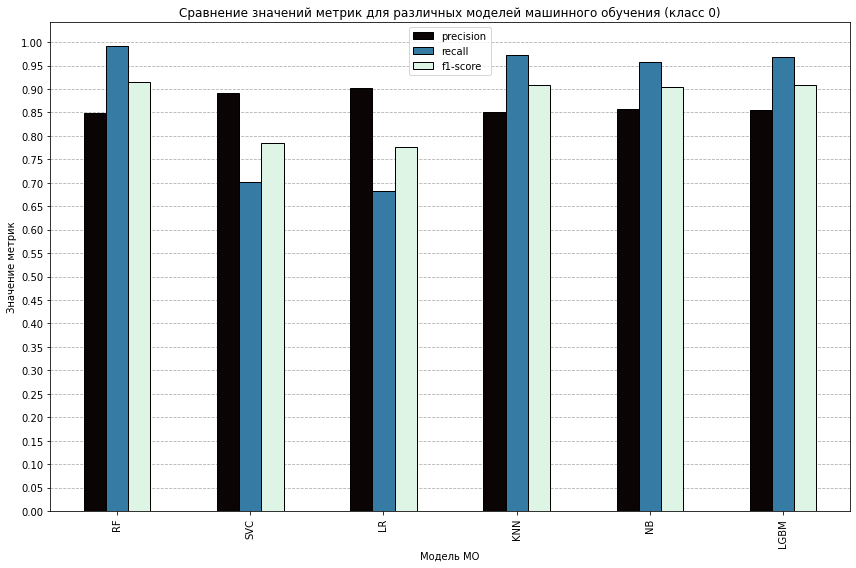

In [283]:
ax = class_0_metrics_df.iloc[:, :-1].plot(kind='bar', 
                                     figsize=(12, 8), colormap='mako', 
                                     ec='k', zorder=2,
                                     yticks=np.arange(0, 1.05, 0.05),
                                     ylabel='Значение метрик', xlabel='Модель МО',
                                     title='Сравнение значений метрик для различных моделей машинного обучения (класс 0)',
                                     );
ax.grid("on", axis="y", ls='--')

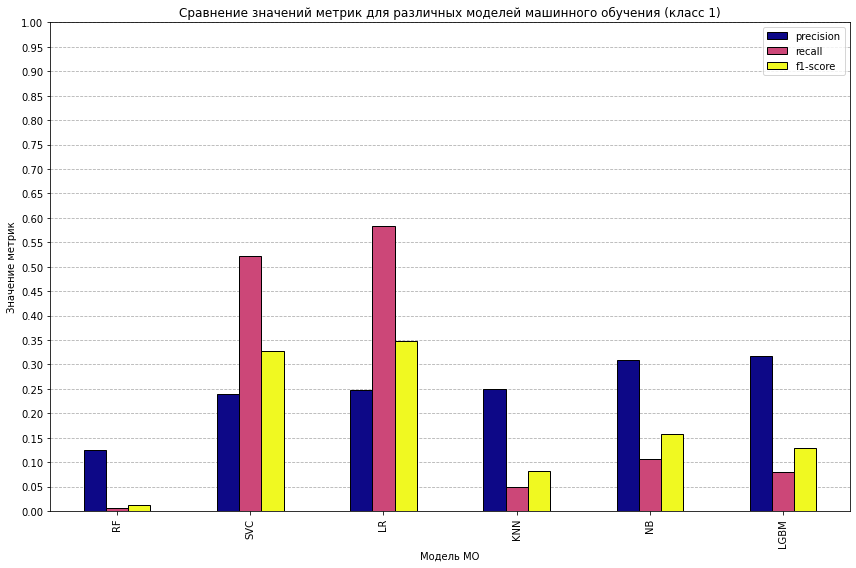

In [284]:
ax = class_1_metrics_df.iloc[:, :-1].plot(kind='bar', 
                                     figsize=(12, 8), colormap='plasma', 
                                     ec='k', zorder=2,
                                     yticks=np.arange(0, 1.05, 0.05),
                                     ylabel='Значение метрик', xlabel='Модель МО',
                                     title='Сравнение значений метрик для различных моделей машинного обучения (класс 1)',
                                     );
ax.grid("on", axis="y", ls='--')

Лучше всего показывает себя логистическая регрессия. Будем использовать ее. В следующем разделе также попробуем использовать классификатор от XGBoost.

# Подбор гиперпараметров

## Улучшение логистической регрессии

In [285]:
lr_model = imbpipeline(steps=[('preprocessor', transformer),
#                             ('smote', sampler),
                            ('classifier', lr)])

In [286]:
# list(lr_model.get_params().keys())

In [287]:
param_grid = [{
    'classifier__C' : [100, 10, 1.0, 0.1, 0.01],
    'classifier__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'preprocessor__num_preprocessing__imputer__n_neighbors':[2, 5, 7, 10],
    'classifier__class_weight':['balanced', 'None'],
    'classifier__random_state':[42]
    }]

# Create grid search object

# lr_search = GridSearchCV(lr_model, param_grid = param_grid, cv = 5, verbose=3, n_jobs=-1, scoring='f1')
# lr_search.fit(X_train, y_train)

In [288]:
# lr_search.best_params_

In [289]:
kimp = KNNImputer(n_neighbors=5)
best_lr = LogisticRegression(C=0.001,
 class_weight='balanced',
 random_state=42,
 solver='sag')

best_model = Pipeline([
    ('transformer', transformer),
    ('clf', best_lr)
])

best_model.fit(X_train, y_train)
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.66      0.77       899
           1       0.25      0.62      0.35       161

    accuracy                           0.66      1060
   macro avg       0.58      0.64      0.56      1060
weighted avg       0.81      0.66      0.70      1060



In [290]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(best_model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.5f' % np.mean(scores))

Mean ROC AUC: 0.71625


## Использование градиентного бустинга

In [291]:
from sklearn.metrics import roc_curve

In [292]:
from xgboost import XGBClassifier

In [293]:
xgb = XGBClassifier(learning_rate=0.01,
                    max_depth = 2, 
                    n_estimators = 150,
                    scale_pos_weight=6,
                    random_state=42)

xgb_model = Pipeline([
    ('transformer', transformer),
    ('clf', xgb)
])

xgb_model.fit(X_train, y_train)
print(classification_report(y_test, xgb_model.predict(X_test)))

[11:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.91      0.54      0.68       899
           1       0.22      0.71      0.33       161

    accuracy                           0.57      1060
   macro avg       0.56      0.62      0.50      1060
weighted avg       0.81      0.57      0.63      1060



In [294]:
import time

In [295]:
# list(xgb_model.get_params().keys())

In [296]:
# param_grid = [{'clf__gamma': [0, 0.01, 0.1, 1, 10],
#               'clf__learning_rate': [0.01, 0.1, 1],
#               'clf__max_depth': [1,2,5],
#               'clf__n_estimators': [50,80,100,150],
#               'clf__reg_alpha': [0, 0.01, 0.1, 1, 10],
#               'clf__reg_lambda': [0, 0.01, 0.1, 1, 10],
#               'clf__random_state':[42]}]
# t0 = time.time()
# xgb_search = GridSearchCV(xgb_model, param_grid = param_grid, cv = 5, verbose=3, n_jobs=-1, scoring='recall')
# xgb_search.fit(X_train, y_train)
# t1 = time.time()
# print(t1-t0)

[11:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':"Матрица ошибок для XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,\n              gamma=0, gpu_id=-1, importance_type=None,\n              interaction_constraints='', learning_rate=0.01, max_delta_step=0,\n              max_depth=2, min_child_weight=1, missing=nan,\n              monotone_constraints='()', n_estimators=150, n_jobs=8,\n              num_parallel_tree=1, predictor='auto', random_state=42,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,\n              tree_method='exact', validate_parameters=1, verbosity=None)"}>

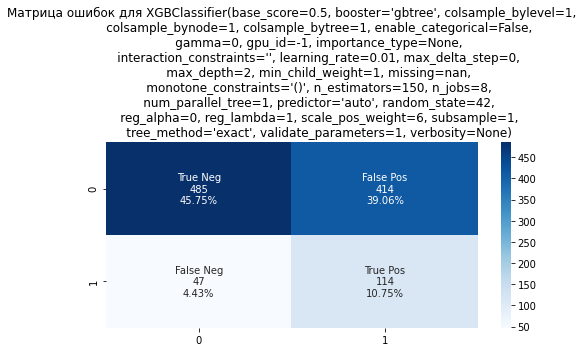

In [297]:
make_cf_matrix(xgb)

Данный алгоритм довольно неплохо (относительно предыдущих моделей) распознает пациентов с риском развития ССЗ, что нам и требуется, но есть и недостаток. Алгоритм часто ошибается и относит здоровых людей к группе риска. Это не очень хорошо, но стоит помнить, что гораздо важнее распознать больного, чем ошибочно назвать здорового больным.

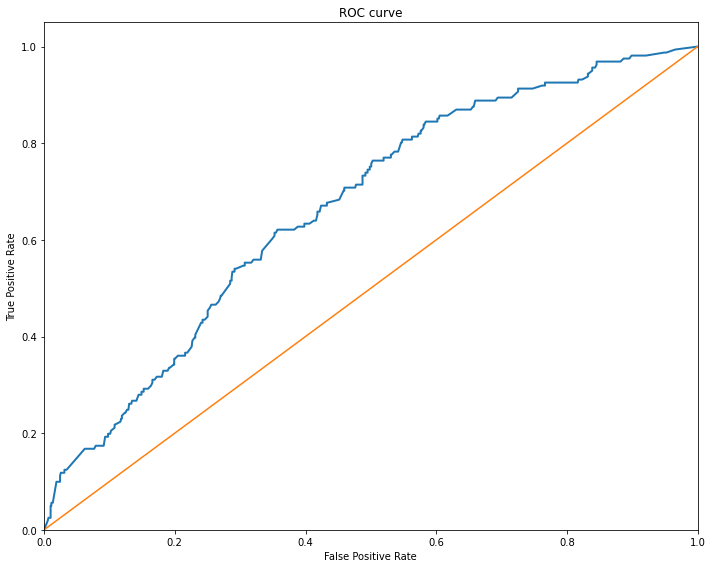

In [298]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [299]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(xgb_model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.5f' % np.mean(scores))

Mean ROC AUC: 0.70349


В дальнейшем планируется поработать над feature engineering'ом и дополнительно улучшить модель для улучшения метрик.